In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<h3>In the code block above I imported:</h3><br>
<h4><b>Pandas</b> (lib for data manipulation etc)</h4>
<h4><b>MatPlotLib</b> (for data visualisation)</h4>
<h4><b>Numpy</b> (Core of all DS libraries</h4>
<h4><b>Seaborn</b> (for advanced data visualisation)</h4>

In [78]:
# data is a main DataFrame used
data = pd.read_csv('StudentPerformanceFactors.csv')
# print(data.iloc[0]['Parental_Involvement'])


In [79]:
data.drop_duplicates(inplace=True)  # but there is no duplicates
data.dropna(inplace=True)  # dropped 229 records with some empty fields

# data = data.replace({'Extracurricular_Activities': {'Yes': True, 'No': False}})
# data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
columns_to_map = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
changing = {'Yes': True, 'No': False}

# Here I wanted to change columns values from Yes/No to boolean True/False
for col in columns_to_map:
    data[col] = data[col].map(changing)

In [80]:
data  # how df look like after changes

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                          False            7               73   
1                          False            8               59   
2                           True            7               91   
3                           True            8               98   
4                           True            6               65   
...                          ...          ...              ...   
6602                       False            7               76   
6603                       False            8               81   
6604                        True            6               65   
6605                        True            6               91   
6606                        True            9               94   

     Motivation_Level  Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             True                  0           Low   
1                 Low             True                  2        Medium   
2              Medium             True                  2        Medium   
3              Medium             True                  1        Medium   
4              Medium             True                  3        Medium   
...               ...              ...                ...           ...   
6602           Medium             True                  1          High   
6603           Medium             True                  3           Low   
6604              Low             True                  3           Low   
6605             High             True                  2           Low   
6606           Medium             True                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

      Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                     False              High School               Near   
1                     False                  College           Moderate   
2                     False             Postgraduate               Near   
3                     False              High School           Moderate   
4                     False                  College               Near   
...                     ...                      ...                ...   
6602                  False      

In [103]:
# let's use ready instruments for short DF description
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   bool  
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   bool  
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.252117  
std             1.233984           1.028926     3.914217  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

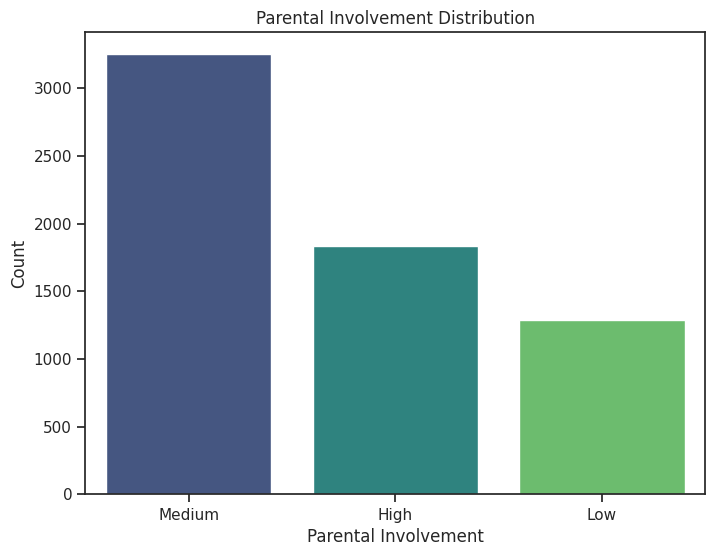

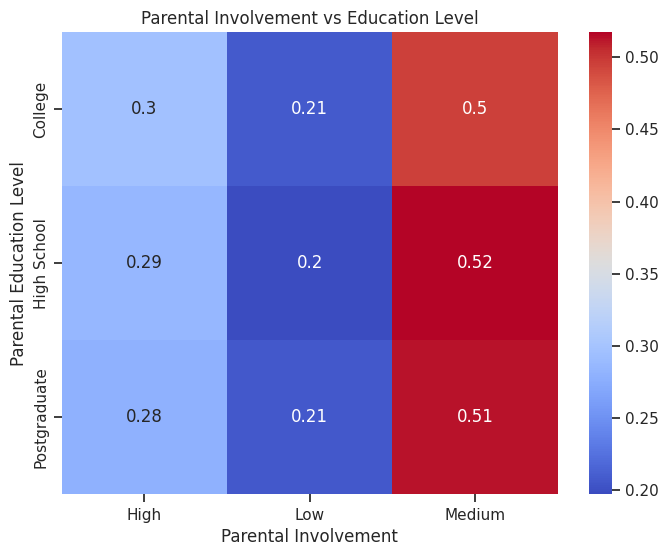

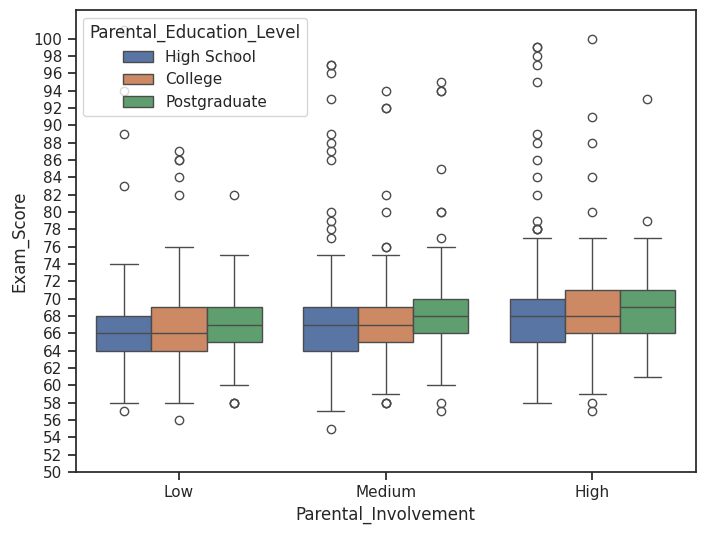

In [122]:
'''
So here are 3 plots, I tried to find any dependencies with Parental Involvement and their 
education level in studying process (sp). 
As you can see in bar plot 1, there are more parents with medium/high involvement in their children sp.

There are almost no correlation (t2) between involvement level and level of education of parents

As I can see in t3, involvement in sp matters more in the PEL, but it PEL plays bigger role 
as involvement increases. 

Still, ones with bigger PEL scored more on median (Q2). Looking at Q2, there is no difference between
college/high_school graduated parents. 

But maybe there are more parents, who are postgraduate students. Let's find this out. 
'''

par_inv = data["Parental_Involvement"].value_counts()
par_inv_df = par_inv.reset_index()
par_inv_df.columns = ["Parental_Involvement", "Count"]

plt.figure(figsize=(8, 6))
sns.barplot(data=par_inv_df, x="Parental_Involvement", y="Count", palette="viridis", hue="Parental_Involvement",
            legend=False)
plt.title("Parental Involvement Distribution")
plt.xlabel("Parental Involvement")
plt.ylabel("Count")

crosstab = pd.crosstab(data['Parental_Education_Level'], data['Parental_Involvement'])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_normalized, annot=True, cmap='coolwarm', cbar=True)
plt.title('Parental Involvement vs Education Level')
plt.xlabel('Parental Involvement')
plt.ylabel('Parental Education Level')

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Parental_Involvement", y="Exam_Score", hue="Parental_Education_Level")
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(50, 100 + 1, 2))

pass  # to hide output of last line

Text(66.24999999999999, 0.5, 'Parental Education Level')

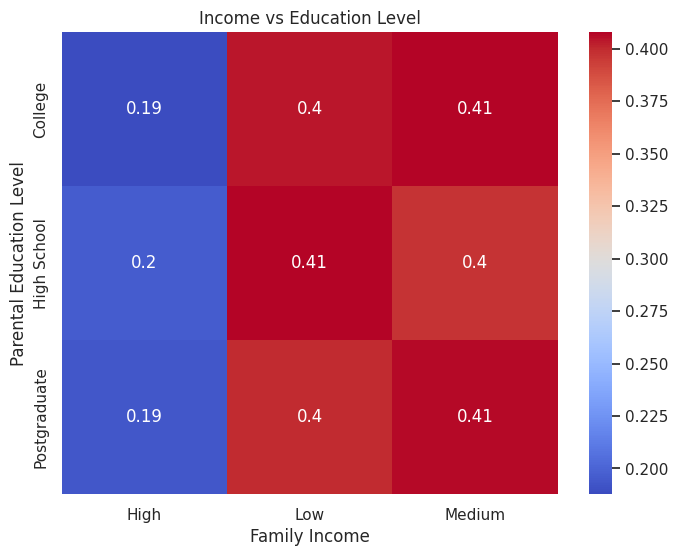

In [83]:
'''
Ask if it's possible. (!)
'''
crosstab = pd.crosstab(data['Parental_Education_Level'], data['Family_Income'])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_normalized, annot=True, cmap='coolwarm', cbar=True)
plt.title('Income vs Education Level')
plt.xlabel('Family Income')
plt.ylabel('Parental Education Level')

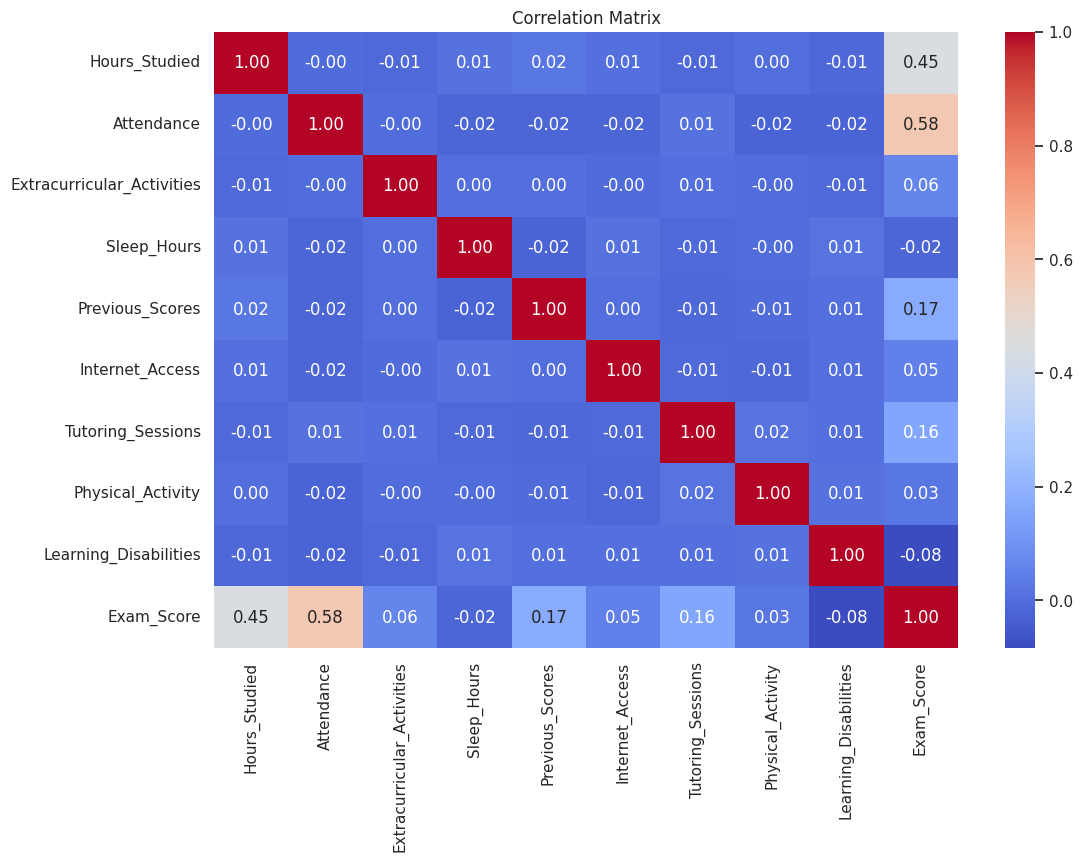

In [84]:
# Unfortunately we don't see many correlations here. But it still sounds obvious that
# Hours Studied and Exam Score correlate
# Attendance may also correlate with Exam Score
# Nice to compare Sleep Hours and result
# Sleep Hours and Parental Involvement correlation
# Parental Involvement and Hours Studied 
# Physical Activity and Exam Score
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


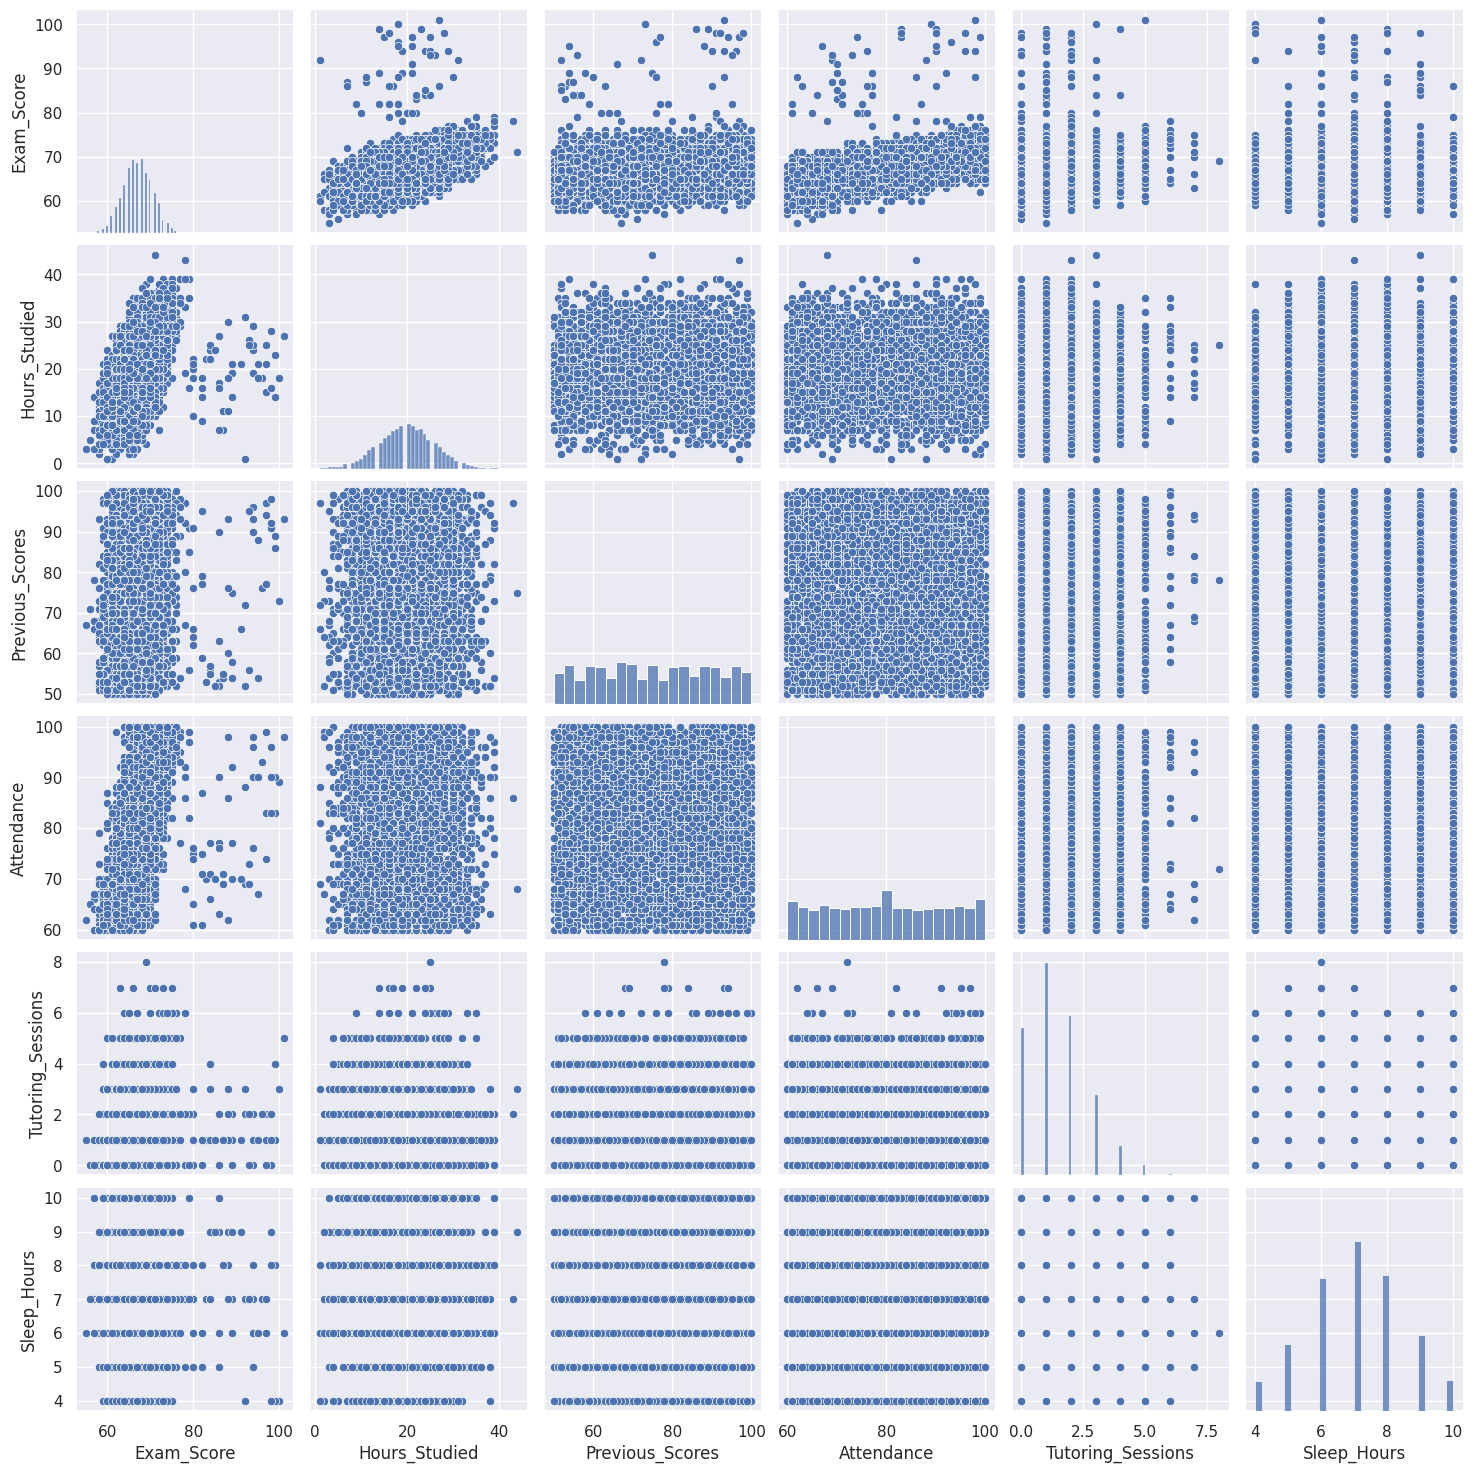

In [85]:
sns.pairplot(data,
             vars=['Exam_Score', 'Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions', 'Sleep_Hours'])

Text(0.5, 1.0, 'Hours Studied vs Exam Score')

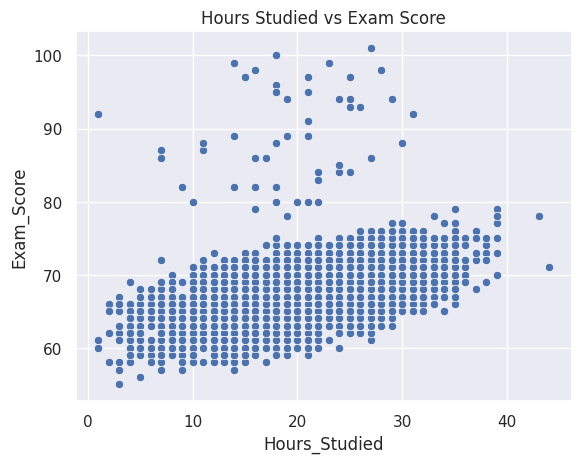

In [86]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Hours Studied vs Exam Score')


Text(0.5, 1.0, 'Distance from Home vs Exam Score')

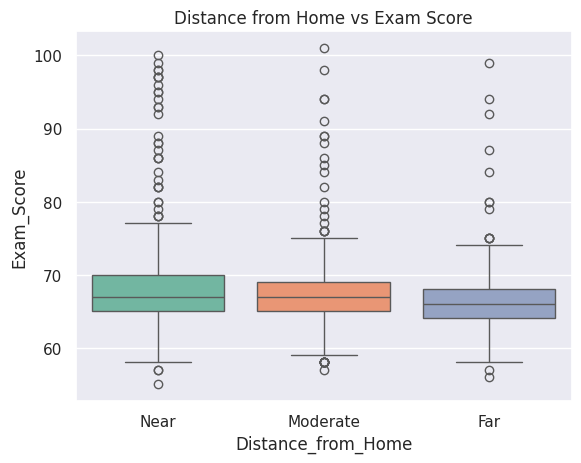

In [87]:
sns.boxplot(x='Distance_from_Home', y='Exam_Score', data=data, palette='Set2', hue='Distance_from_Home', legend=False)
plt.title('Distance from Home vs Exam Score')
# maybe if student lives close to University he will Attend more and Study more

<Axes: xlabel='Distance_from_Home', ylabel='Hours_Studied'>

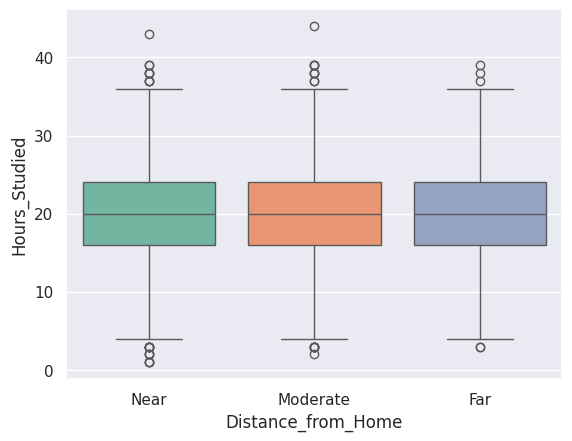

In [88]:
sns.boxplot(x='Distance_from_Home', y='Hours_Studied', data=data, palette='Set2', hue='Distance_from_Home',
            legend=False)
# I find it really strange

<Axes: xlabel='Distance_from_Home', ylabel='Attendance'>

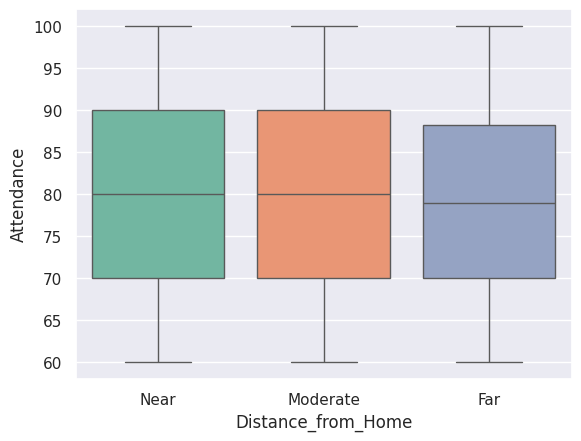

In [89]:
sns.boxplot(x='Distance_from_Home', y='Attendance', data=data, palette='Set2', hue='Distance_from_Home', legend=False)
# So ones who live far attend a bit less (but it may be negligible) 

Text(0.5, 1.0, 'Quality of teachers vs Exam Score')

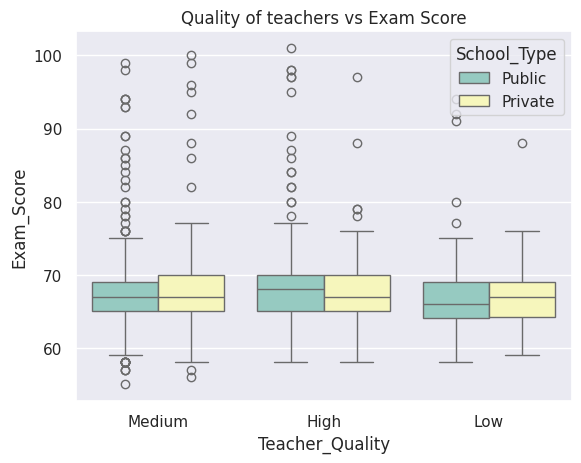

In [90]:
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=data, palette='Set3', hue='School_Type', legend=True)
plt.title('Quality of teachers vs Exam Score')


Text(0.5, 1.0, 'Access to Resources vs Exam Score')

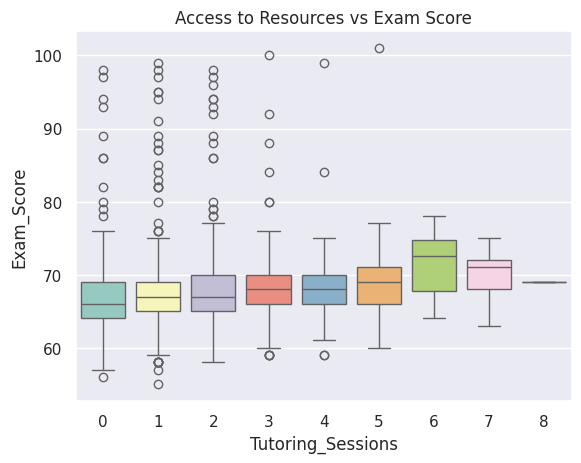

In [91]:
sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', data=data, palette='Set3', hue='Tutoring_Sessions', legend=False)
plt.title('Access to Resources vs Exam Score')


<Axes: xlabel='Attendance', ylabel='Exam_Score'>

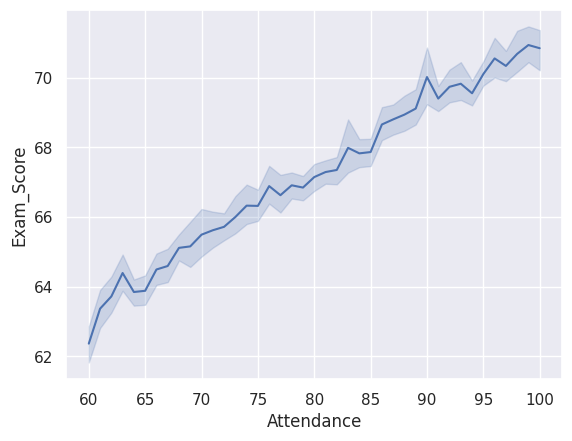

In [92]:
sns.lineplot(x='Attendance', y='Exam_Score', data=data, orient='x')

<Axes: xlabel='Physical_Activity', ylabel='Exam_Score'>

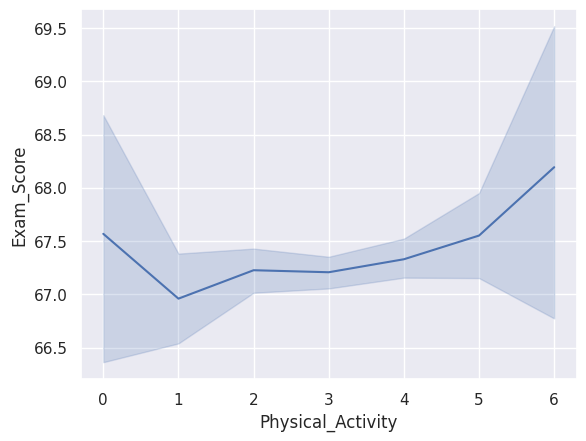

In [93]:
sns.lineplot(x='Physical_Activity', y='Exam_Score', data=data, orient='x')

<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

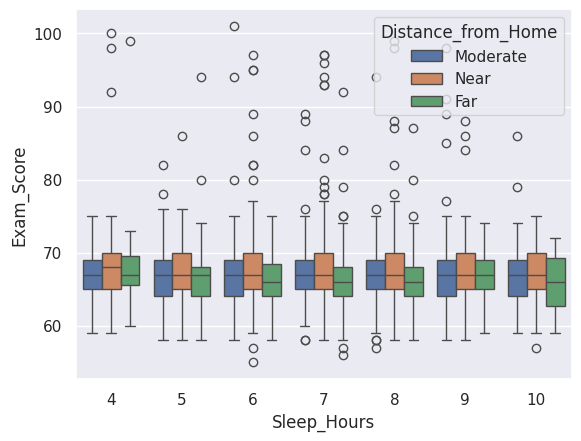

In [94]:
# sns.lineplot(x='Sleep_Hours', y='Exam_Score', data=data, hue='Distance_from_Home')

sns.boxplot(data=data, x='Sleep_Hours', y='Exam_Score', hue='Distance_from_Home')

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

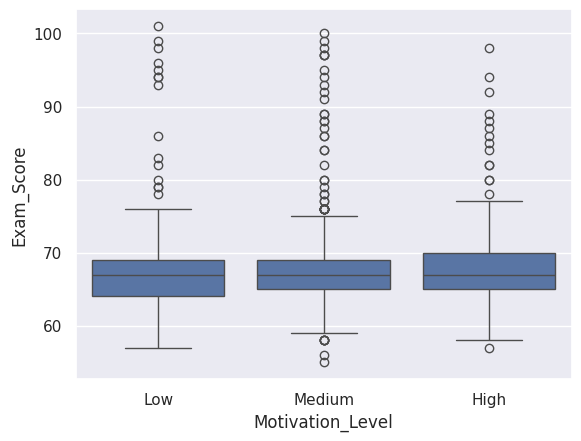

In [95]:
sns.boxplot(data=data, x='Motivation_Level', y='Exam_Score')

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

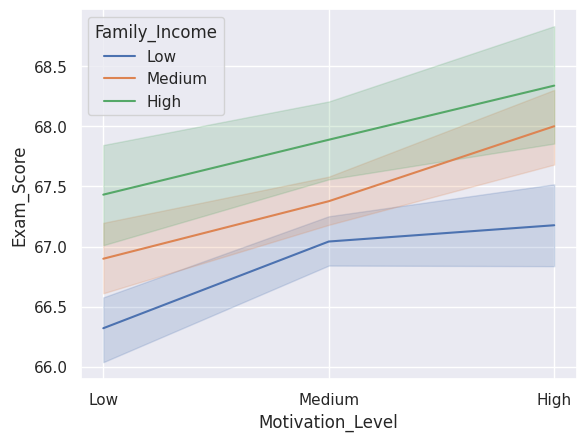

In [96]:
sns.lineplot(data=data, x='Motivation_Level', y='Exam_Score', hue='Family_Income')

<Axes: xlabel='Motivation_Level', ylabel='Family_Income'>

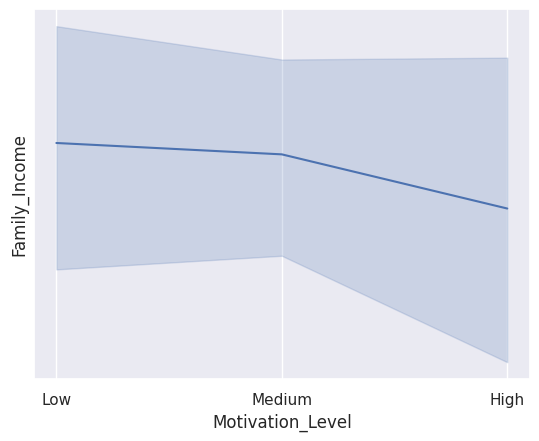

In [97]:
sns.lineplot(data=data, x='Motivation_Level', y='Family_Income')

<Axes: xlabel='Gender', ylabel='Exam_Score'>

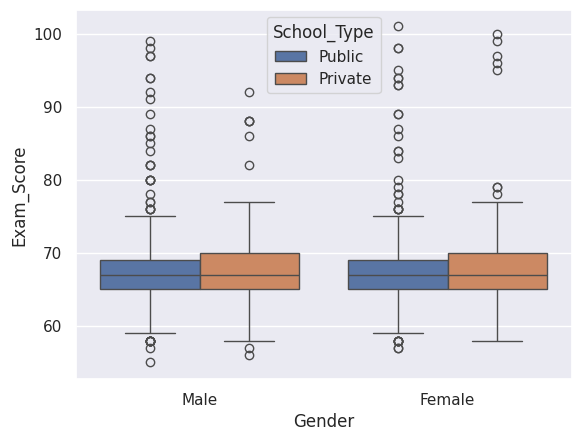

In [98]:
sns.boxplot(data=data, x='Gender', y='Exam_Score', hue='School_Type')

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

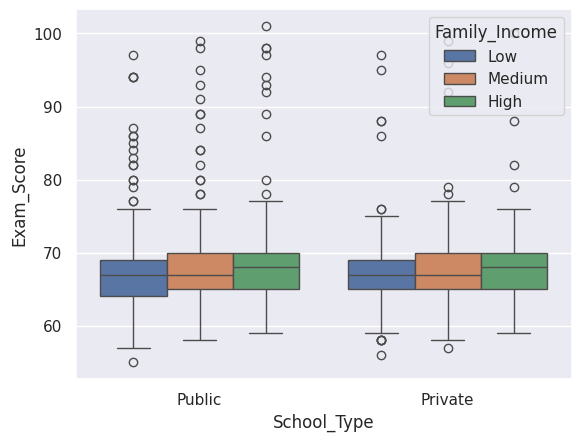

In [99]:
sns.boxplot(data=data, x='School_Type', y='Exam_Score', hue='Family_Income')

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

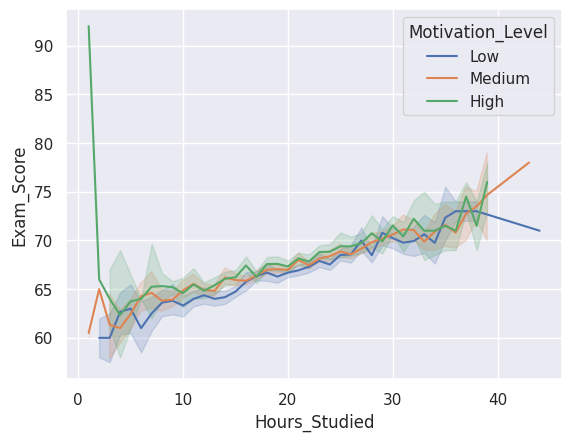

In [100]:
sns.lineplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Motivation_Level')

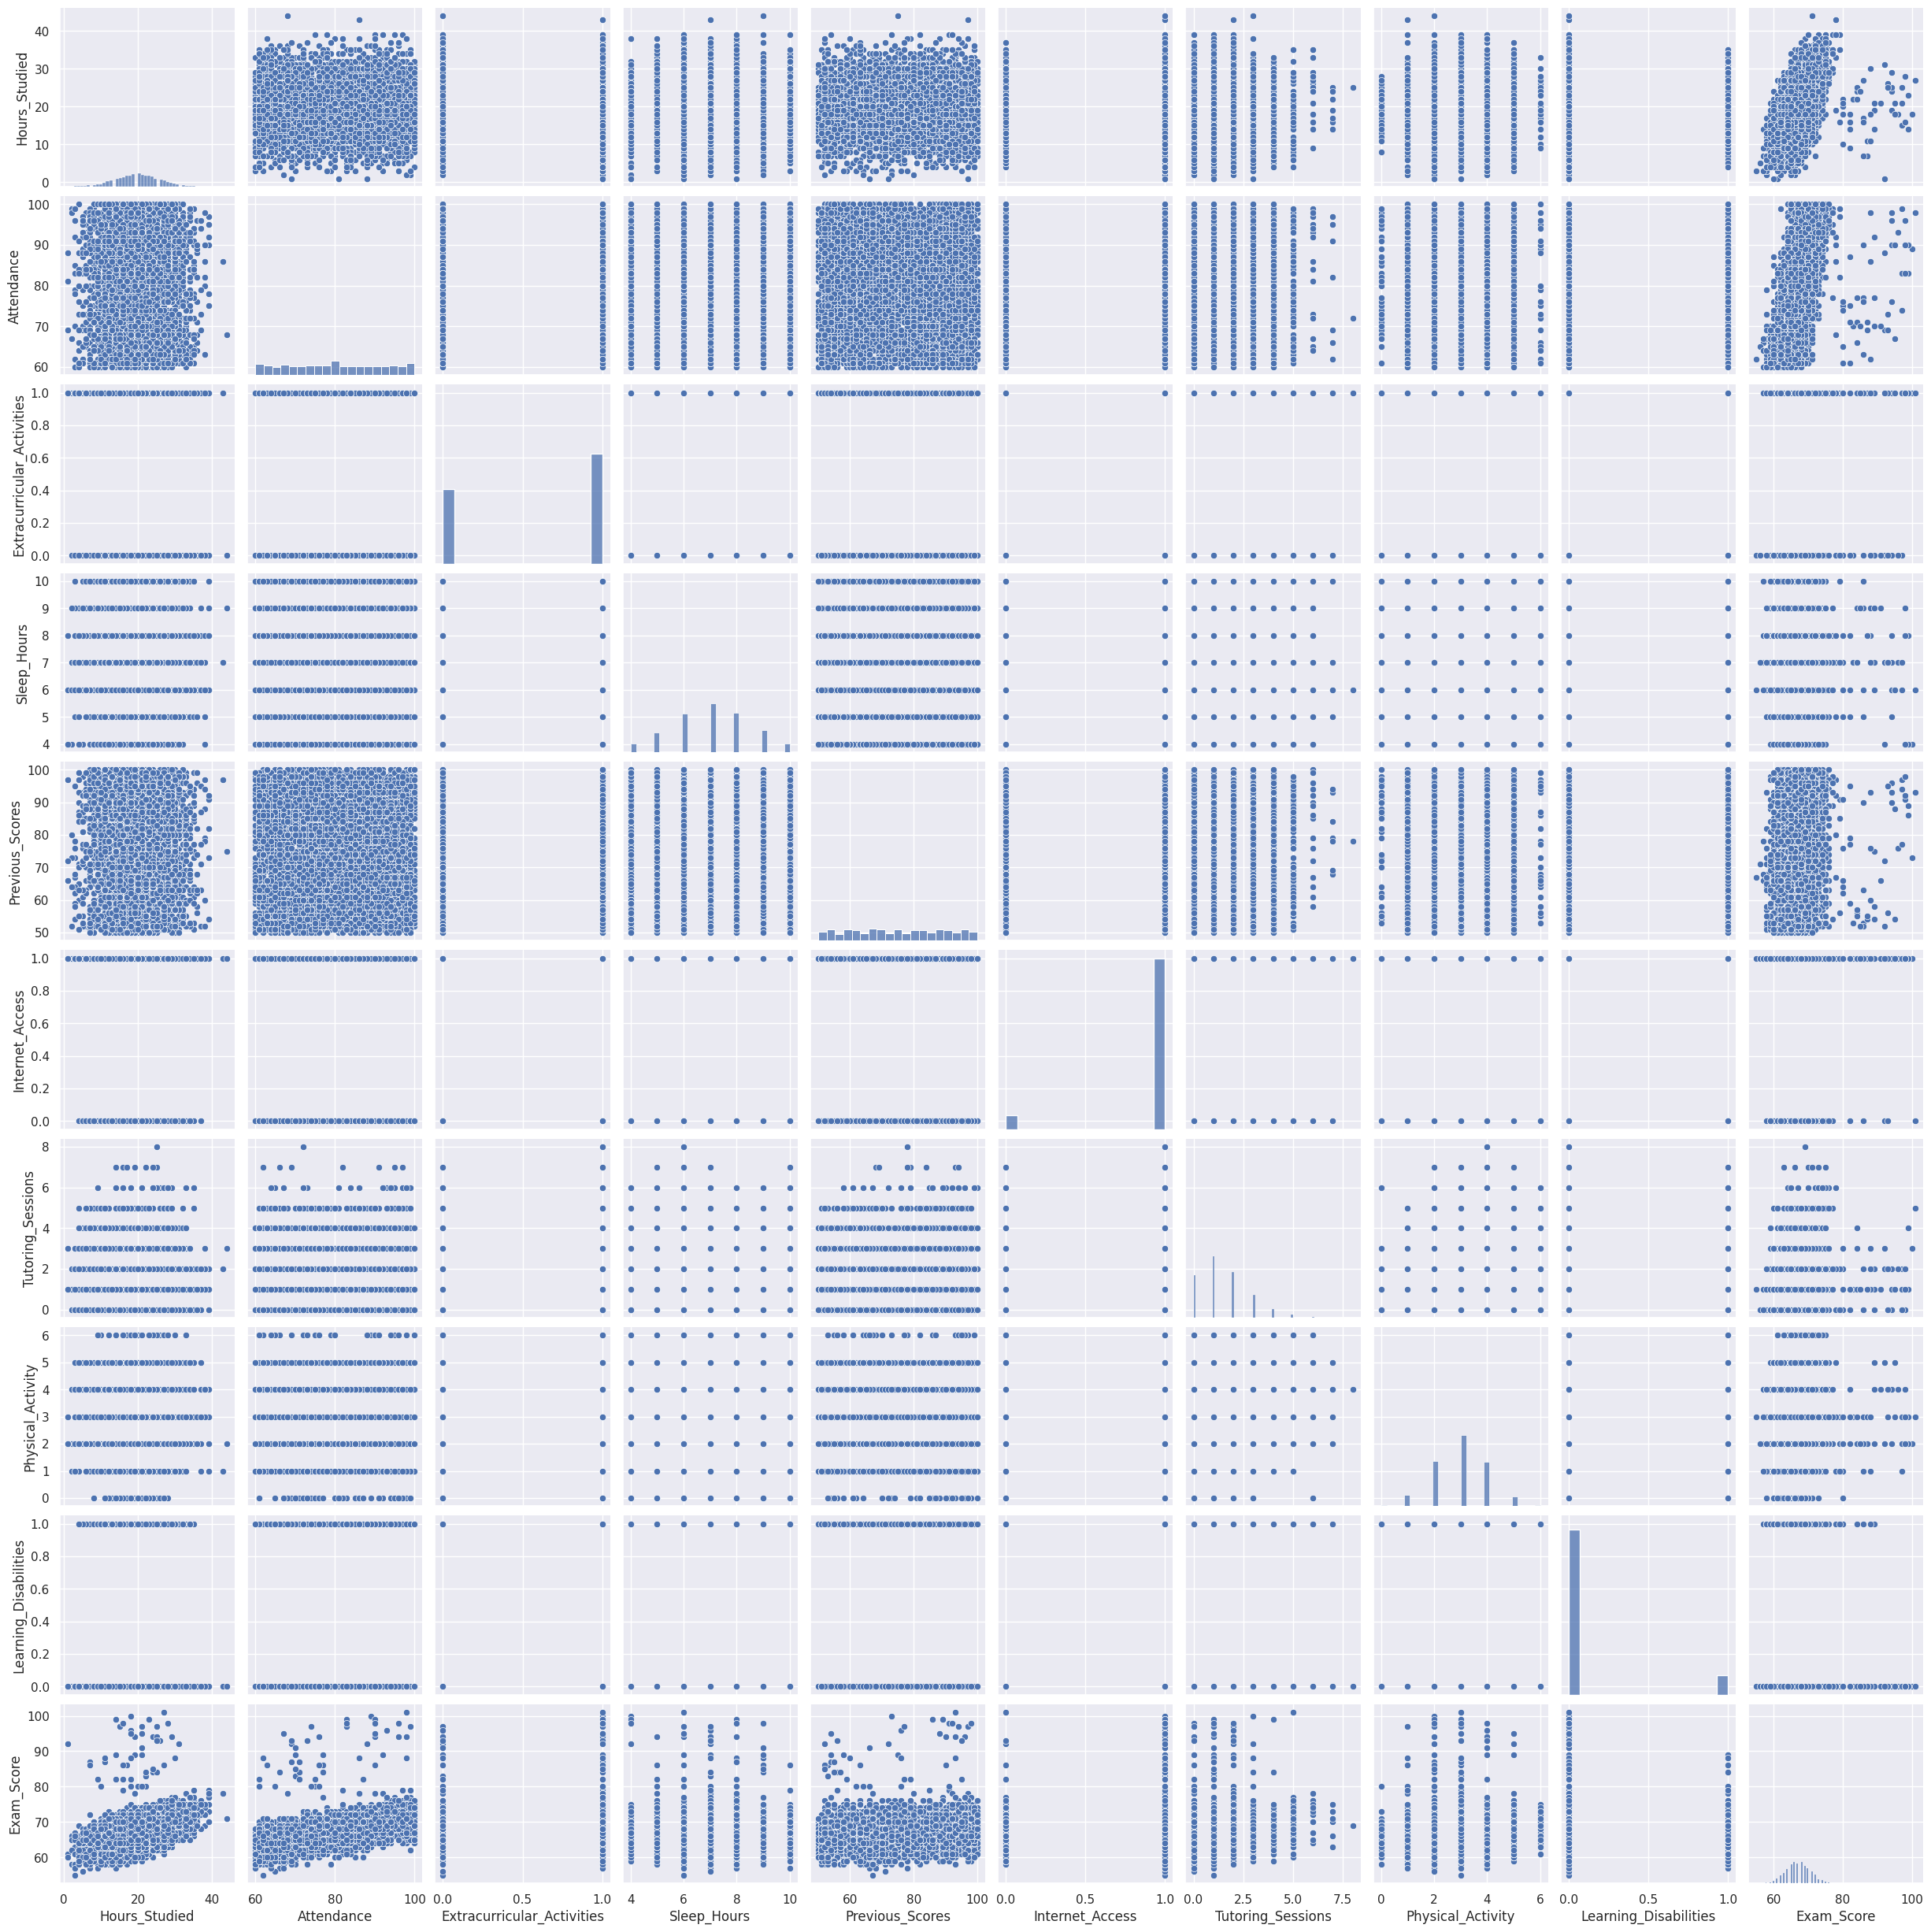

In [101]:
sns.pairplot(data)

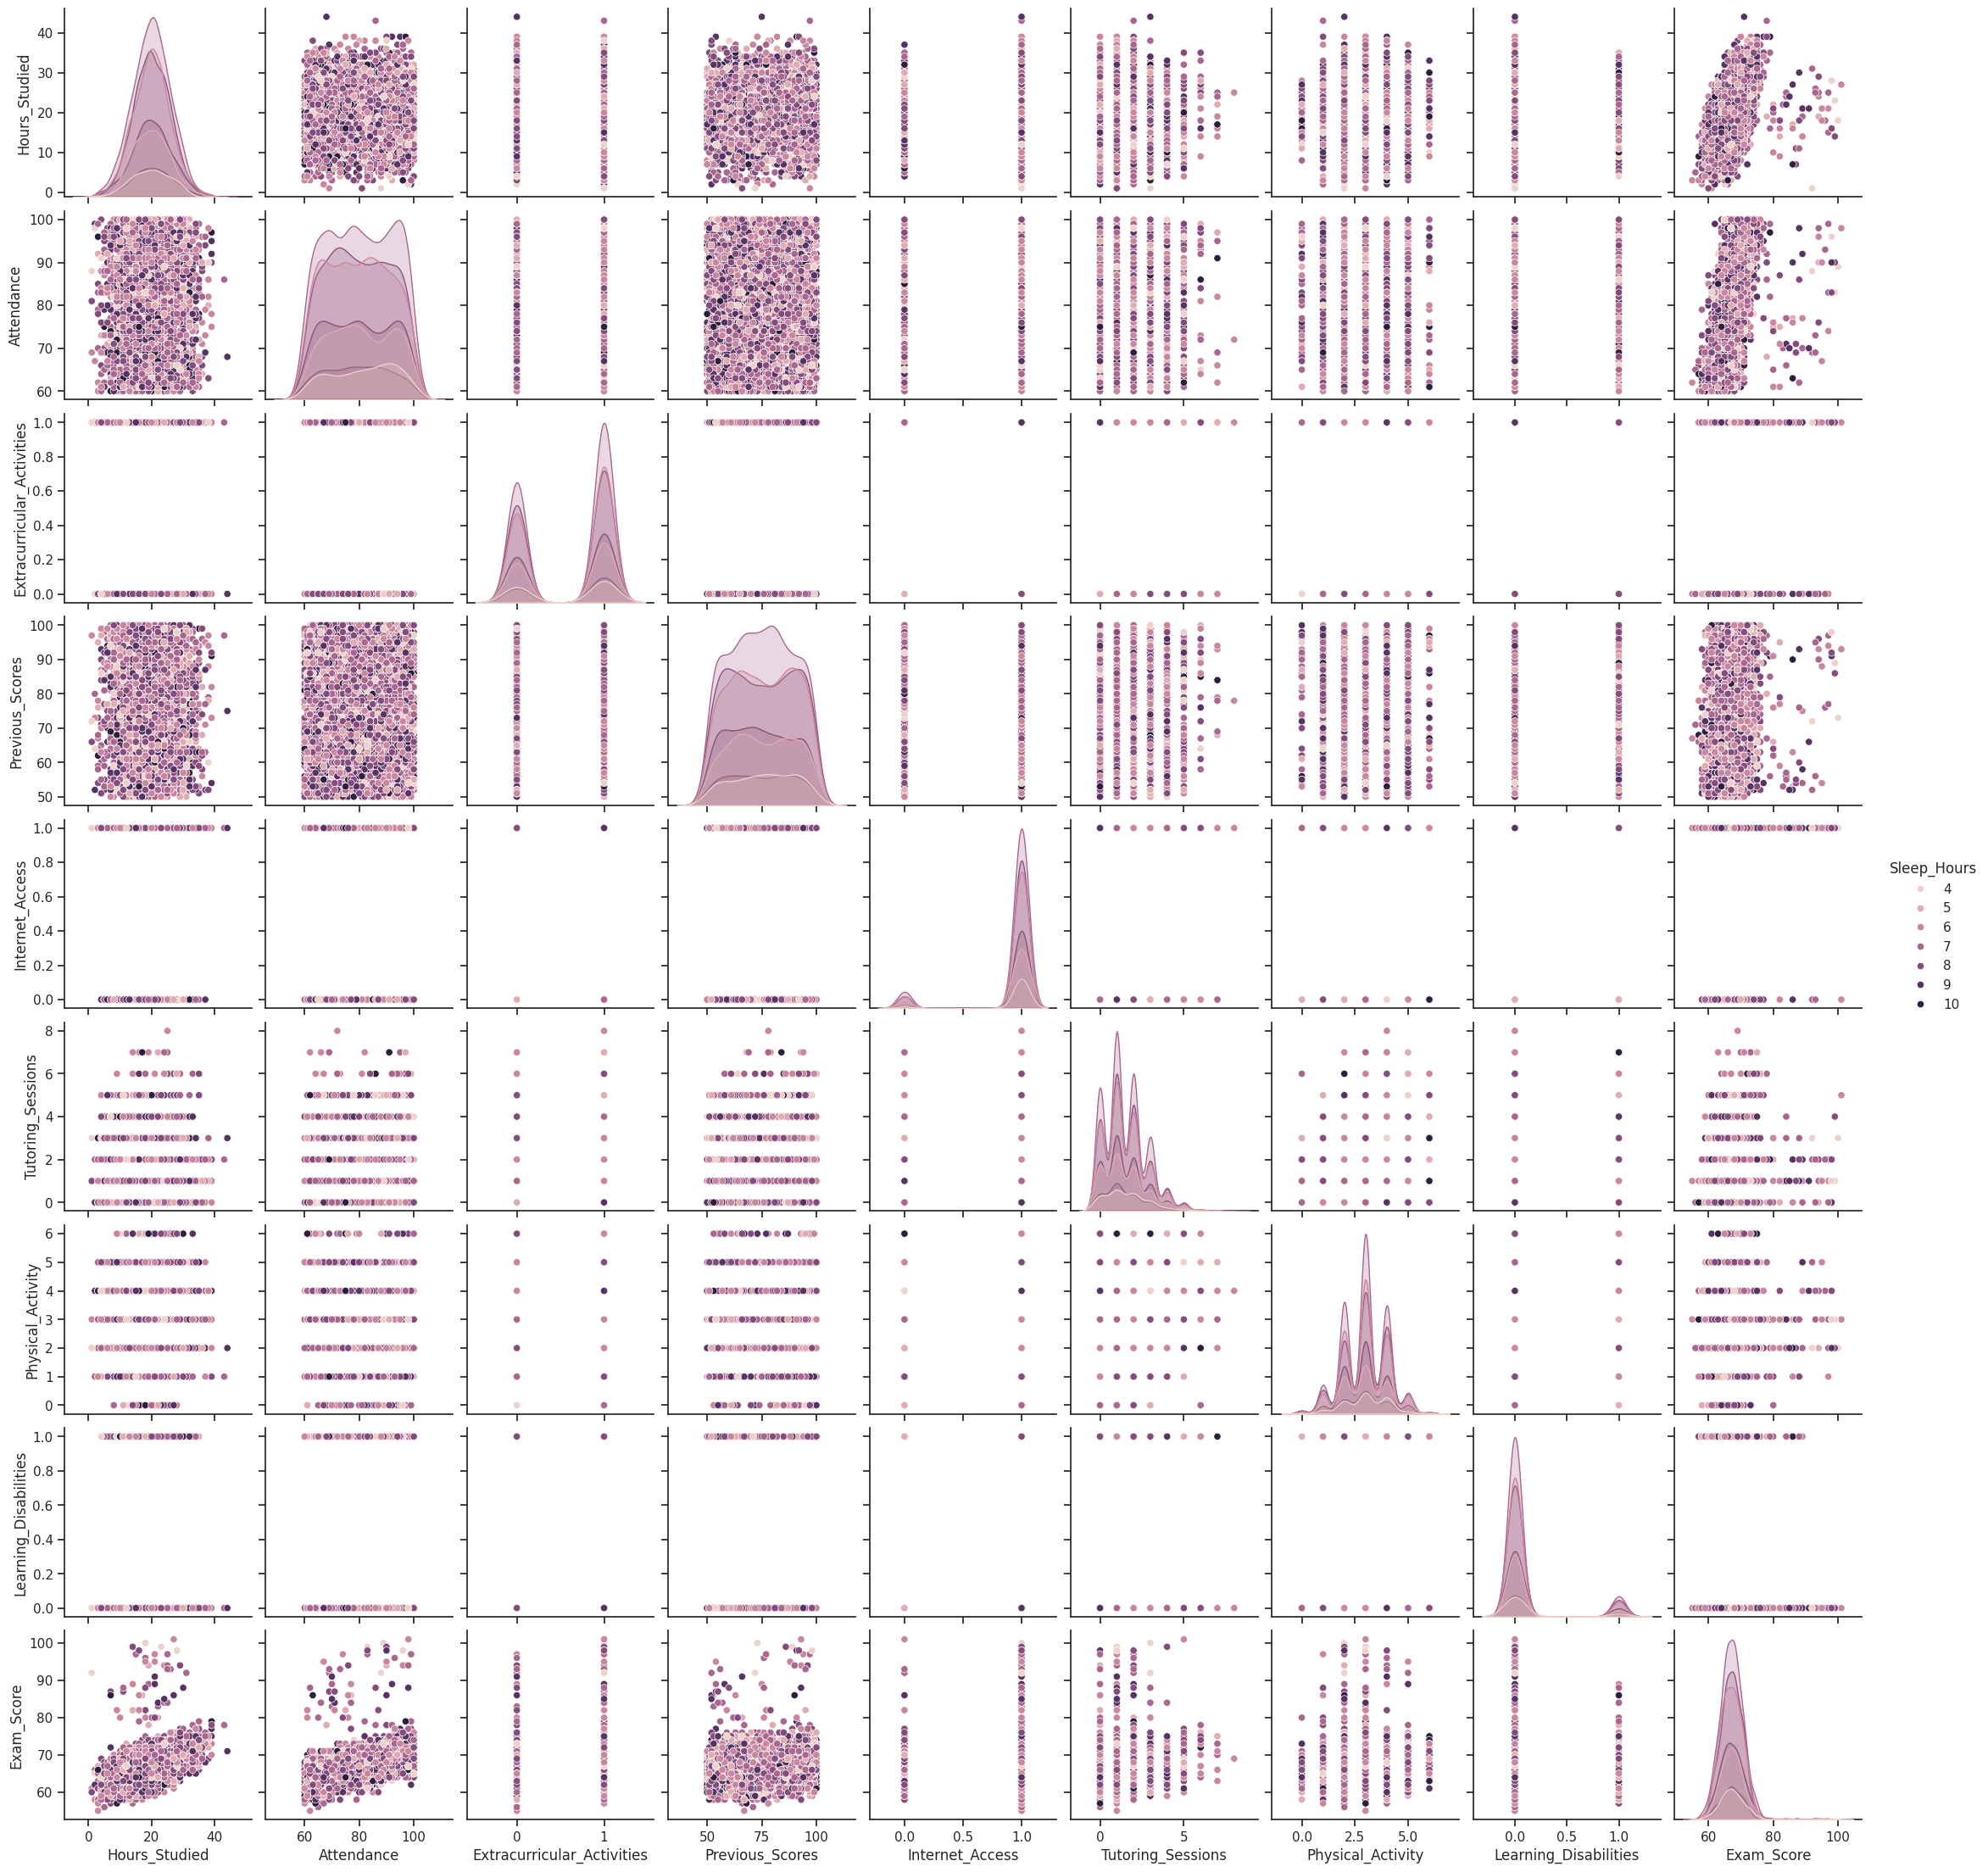

In [102]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Sleep_Hours")